In [84]:
"""
    使用numpy实现Boston房价预测
    Step1 数据加载，来源sklearn中的load_boston
    Step2 数据规范化，将X 采用正态分布规范化
    Step3 初始化网络
    Step4 定义激活函数，损失函数，学习率 epoch
    Step5 循环执行：前向传播，计算损失函数，反向传播，参数更新
    Step6 输出训练好的model参数，即w1, w2, b1, b2
""" 
import numpy as np
from sklearn.datasets import load_boston
from sklearn.utils import shuffle, resample
import matplotlib.pyplot as plt
np.random.seed(0)

In [85]:
# 数据加载
data = load_boston()                                            
X_ = data['data']                                                
y = data['target']                                              
# 将y转化为矩阵的形式                                          
y = y.reshape(y.shape[0],1)    

# 分为train和test集
y_test = y[450:]
y = y[:450]

# 数据规范化
# X_ = ((X_ - np.mean(X_, axis=0)) / np.std(X_, axis=0))
X_ = ((X_ - np.mean(X_, axis=0)) / np.std(X_, axis=0))

# 分为train和test集
X_test = X_[450:]
X_ = X_[:450]

In [86]:
print(X_.shape)
print(X_test.shape)
print(y.shape)

(450, 13)
(56, 13)
(450, 1)


In [87]:
"""
    初始化网络参数
    定义隐藏层维度，w1,b1,w2,b2
""" 
n_features = X_.shape[1]
n_hidden = 10
w1 = np.random.randn(n_features, n_hidden)
b1 = np.zeros(n_hidden)
w2 = np.random.randn(n_hidden, 1)
b2 = np.zeros(1)

In [88]:
# relu函数
def Relu(x):
    """ 这里写你的代码 """
    y = np.where(x<0,0,x)
    return y

def relu_gradient(z):
    g = np.array([(i>0) for i in z ])
    return g

Text(0, 0.5, 'g')

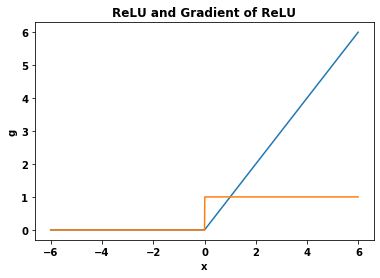

In [89]:
fig = plt.figure(figsize=plt.figaspect(0.3))
ax = fig.add_subplot(1, 2, 2)
x = np.arange(-6, 6, 0.01)
f = Relu(x)
ax.plot(x, f)
f_prime = relu_gradient(x)
ax.plot(x, f_prime)
ax.set_title("ReLU and Gradient of ReLU")
ax.set_xlabel('x')
ax.set_ylabel('g')

In [90]:
# 设置学习率
learning_rate = 1e-6

# 定义损失函数
def MSE_loss(y, y_hat):
    """ 这里写你的代码 """
    return 1/(2*len(y_hat))*np.sum((y_hat - y)**2)

# 定义线性回归函数
def Linear(X, W, b):
    """ 这里写你的代码 """
    return X@W + b

In [91]:

# 5000次迭代
for t in range(5000):
# for t in range(1):
    # 前向传播，计算预测值y (Linear->Relu->Linear)
    """ 这里写你的代码 """
    Z1 = Linear(X_, w1, b1)
    A1 = Relu(Z1)
    Z2 = Linear(A1, w2, b2)
    A2 = Z2
    
    # 计算损失函数, 并输出每次epoch的loss
    """ 这里写你的代码 """
    print('loss: ',MSE_loss(y, A2))

    # 反向传播，基于loss 计算w1和w2的梯度
    """ 这里写你的代码 """    
    dZ2 = A2 - y
    dW2 = 1/n_features *A1.T @ dZ2   
    dB2 = 1/n_features * np.sum(dZ2, axis = 0, keepdims = True )
    
    dZ1 = dZ2 @ w2.T * relu_gradient(Z1)
    dW1 = 1/n_features * X_.T @ dZ1
    dB1 = 1/n_features * np.sum(dZ1, axis = 0, keepdims = True )

    # 更新权重, 对w1, w2, b1, b2进行更新
    """ 这里写你的代码 """    
    w2 = w2 - learning_rate* dW2
    b2 = b2 - learning_rate * dB2
    w1 = w1 - learning_rate * dW1
    b1 = b1 - learning_rate * dB1


# 得到最终的w1, w2
print('w1={} \n w2={}'.format(w1, w2))
print('b1={} \n b2={}'.format(b1, b2))

loss:  366.3276168041339
loss:  365.6765408932675
loss:  365.02740500672854
loss:  364.38020030818024
loss:  363.73491801712237
loss:  363.09154940847355
loss:  362.4500981124121
loss:  361.81056510786595
loss:  361.1729121063071
loss:  360.53712508692956
loss:  359.9032083833519
loss:  359.2711535969083
loss:  358.64095238151225
loss:  358.01259644326694
loss:  357.3860775400795
loss:  356.76138748127806
loss:  356.1385181272319
loss:  355.51746138897596
loss:  354.8982092278371
loss:  354.28075365506487
loss:  353.66508673146404
loss:  353.0512005670319
loss:  352.43908732059714
loss:  351.82873919946275
loss:  351.2201887713158
loss:  350.6134553454551
loss:  350.00846287183197
loss:  349.40520375675624
loss:  348.80367045319844
loss:  348.20384055594815
loss:  347.60568960886525
loss:  347.0092175691078
loss:  346.4143827158253
loss:  345.8212358746141
loss:  345.229769774586
loss:  344.63997718919694
loss:  344.0518509359277
loss:  343.46538387596627
loss:  342.8805817222635
loss:

loss:  202.6877400824396
loss:  202.4313074166393
loss:  202.1754055045298
loss:  201.9200332301114
loss:  201.6651796122105
loss:  201.4108245160439
loss:  201.1569957949893
loss:  200.9036923483552
loss:  200.65091307916254
loss:  200.39865717679456
loss:  200.14680834911206
loss:  199.89525232112257
loss:  199.64415570135887
loss:  199.39357775598015
loss:  199.1435174151347
loss:  198.89397361249746
loss:  198.64494528524585
loss:  198.39642615388954
loss:  198.1483647327864
loss:  197.90081572109324
loss:  197.65377807068876
loss:  197.4072507368339
loss:  197.16121023632968
loss:  196.91540369346407
loss:  196.67010384272564
loss:  196.4253096560433
loss:  196.1810201086131
loss:  195.93723469412564
loss:  195.6939543006116
loss:  195.451175447471
loss:  195.2088971231403
loss:  194.96711831921144
loss:  194.72583803041064
loss:  194.48505525457716
loss:  194.24476899264192
loss:  194.00491796848655
loss:  193.76550013256028
loss:  193.5265758123757
loss:  193.28814402262327
loss

loss:  134.9534946253305
loss:  134.83002781818084
loss:  134.70682393551266
loss:  134.58388243383934
loss:  134.46120277018122
loss:  134.3387844020664
loss:  134.2166267875316
loss:  134.09472938512266
loss:  133.9730651077523
loss:  133.8516259428321
loss:  133.7304455865239
loss:  133.6095198372752
loss:  133.4888464923665
loss:  133.36842640984884
loss:  133.2482588148093
loss:  133.12834748175857
loss:  133.0086900519825
loss:  132.88928378860257
loss:  132.77013212994547
loss:  132.65123454037516
loss:  132.5325904847716
loss:  132.4141994285318
loss:  132.29606083757074
loss:  132.1781741783223
loss:  132.0605389177403
loss:  131.94315452329946
loss:  131.8260204629963
loss:  131.70908972403825
loss:  131.59220757260417
loss:  131.4755742375548
loss:  131.35917648669619
loss:  131.24298908691938
loss:  131.12704910495034
loss:  131.0113293032206
loss:  130.89582526764633
loss:  130.78056712557415
loss:  130.6655543514209
loss:  130.55078495519837
loss:  130.43615556213607
loss

loss:  100.65035696631868
loss:  100.59178539686648
loss:  100.53331464205665
loss:  100.47494442022321
loss:  100.41667177348812
loss:  100.35849454013301
loss:  100.30041699149422
loss:  100.24243885254094
loss:  100.1845602961354
loss:  100.1267812827359
loss:  100.06910084402172
loss:  100.01151869645595
loss:  99.95403456364846
loss:  99.89664816989536
loss:  99.83935924017837
loss:  99.7821675001641
loss:  99.72507267620348
loss:  99.6680744953311
loss:  99.61117268526442
loss:  99.55436697440332
loss:  99.49765709182917
loss:  99.44098678799435
loss:  99.38416077513114
loss:  99.32742997051459
loss:  99.27079410617236
loss:  99.21425291480716
loss:  99.15780612979611
loss:  99.10145348518996
loss:  99.04519471571244
loss:  98.98902955675952
loss:  98.9329518799582
loss:  98.87685879700723
loss:  98.82085864215074
loss:  98.7649511534193
loss:  98.70913606951112
loss:  98.65341312979128
loss:  98.59778207429105
loss:  98.54224264370714
loss:  98.48679457940094
loss:  98.431437623

loss:  82.64032648461983
loss:  82.60434609535328
loss:  82.56840087306517
loss:  82.53249072957973
loss:  82.49661557701698
loss:  82.46077532779186
loss:  82.4249698946133
loss:  82.38919919048324
loss:  82.35346312869594
loss:  82.31776162283685
loss:  82.28209458678191
loss:  82.24646193469643
loss:  82.21086358103447
loss:  82.17529944053773
loss:  82.13976942823479
loss:  82.10427345944012
loss:  82.06881144975333
loss:  82.03338331505813
loss:  81.9979889715216
loss:  81.96262833559314
loss:  81.92730132400382
loss:  81.89200785376532
loss:  81.85674784216904
loss:  81.8215228008746
loss:  81.78633756882883
loss:  81.75118558975929
loss:  81.7160667819302
loss:  81.68098106388142
loss:  81.64592835442771
loss:  81.61090857265789
loss:  81.57592163793393
loss:  81.54096746989006
loss:  81.50604598843204
loss:  81.47115711373617
loss:  81.43629476045537
loss:  81.40145612431415
loss:  81.36664989207871
loss:  81.33187598493134
loss:  81.29713432432085
loss:  81.26242483196165
loss

loss:  71.16427919971737
loss:  71.13573977743552
loss:  71.10721836247762
loss:  71.0787149271397
loss:  71.05022944380636
loss:  71.02176188495075
loss:  70.99331222313397
loss:  70.96488043100497
loss:  70.93646648130009
loss:  70.90806843119094
loss:  70.87961104034555
loss:  70.85117150240812
loss:  70.82274979034158
loss:  70.79434587719496
loss:  70.76595973610307
loss:  70.73759134028622
loss:  70.70924066304987
loss:  70.68090767778436
loss:  70.65259235796465
loss:  70.62429467714979
loss:  70.59601460898288
loss:  70.56775212719066
loss:  70.53950720558312
loss:  70.51127981805335
loss:  70.48306993857713
loss:  70.45487754121264
loss:  70.42670260010021
loss:  70.398545089462
loss:  70.37040498360163
loss:  70.34228225690403
loss:  70.31417703865998
loss:  70.28608957990535
loss:  70.25801942700986
loss:  70.22994757857742
loss:  70.20180865702287
loss:  70.17368709934773
loss:  70.14558288034897
loss:  70.11749328501462
loss:  70.08940765137301
loss:  70.06133932290547
los

loss:  61.60986566808043
loss:  61.58611274628784
loss:  61.56237187712907
loss:  61.5385739979319
loss:  61.51478843823987
loss:  61.491015187721
loss:  61.46725423606746
loss:  61.44350557299567
loss:  61.41976918824602
loss:  61.396045071582954
loss:  61.37233321279478
loss:  61.348633601693614
loss:  61.32494622811528
loss:  61.3012710819193
loss:  61.277608152988705
loss:  61.25395743123005
loss:  61.23031890657323
loss:  61.20669256897152
loss:  61.18307840840136
loss:  61.15947641486239
loss:  61.13588657837732
loss:  61.112308888991784
loss:  61.0887433367744
loss:  61.065189911816596
loss:  61.0416486042325
loss:  61.01811940415898
loss:  60.99460230175542
loss:  60.97109728720377
loss:  60.947604350708374
loss:  60.924123482495986
loss:  60.900653753803006
loss:  60.87718793558058
loss:  60.85373415716478
loss:  60.830292408882634
loss:  60.806862681083054
loss:  60.78344496413679
loss:  60.760039248436335
loss:  60.736645524395875
loss:  60.71326378245127
loss:  60.689894013

loss:  52.930235672981894
loss:  52.910247507563135
loss:  52.89026938081243
loss:  52.87030128714158
loss:  52.85034322096972
loss:  52.830395176723385
loss:  52.81045714883646
loss:  52.79052913175015
loss:  52.770611119912935
loss:  52.75070310778063
loss:  52.730805089816265
loss:  52.71091706049017
loss:  52.6910390142798
loss:  52.671170945669914
loss:  52.651312849152355
loss:  52.63146471922618
loss:  52.61162655039754
loss:  52.59179833717971
loss:  52.57198007409307
loss:  52.552171755665064
loss:  52.53237337643017
loss:  52.5125849309299
loss:  52.492806413712785
loss:  52.47303781933432
loss:  52.453279142357
loss:  52.43353037735022
loss:  52.41379151889034
loss:  52.394062561560574
loss:  52.374343499951095
loss:  52.35463432865888
loss:  52.33493504228775
loss:  52.315245635448406
loss:  52.295566102758265
loss:  52.275896609656684
loss:  52.25623796762586
loss:  52.2365891865228
loss:  52.2169502609874
loss:  52.19732118566631
loss:  52.17770195521285
loss:  52.1580925

loss:  46.1961715245951
loss:  46.179463786990674
loss:  46.162764393876955
loss:  46.14607334133913
loss:  46.12939062546532
loss:  46.11271624234666
loss:  46.09605018807721
loss:  46.07939245875398
loss:  46.062743050477
loss:  46.04610195934919
loss:  46.0294691814764
loss:  46.01284471296746
loss:  45.99622854993405
loss:  45.97962068849084
loss:  45.96302112475537
loss:  45.946429932327554
loss:  45.92984713211945
loss:  45.91327261786182
loss:  45.8967063856837
loss:  45.88014843171708
loss:  45.863575818596374
loss:  45.84697091575336
loss:  45.83037431917899
loss:  45.81378602498837
loss:  45.79720602929948
loss:  45.78063432823324
loss:  45.764070917913365
loss:  45.74751579446651
loss:  45.73096895402215
loss:  45.71443039271261
loss:  45.69790010667309
loss:  45.68137809204163
loss:  45.664864344959085
loss:  45.64835886156914
loss:  45.63186163801829
loss:  45.61537267045592
loss:  45.59889195503413
loss:  45.58241948790785
loss:  45.56595526523485
loss:  45.54949928317563

loss:  40.951763638327165
loss:  40.937440789510816
loss:  40.923125371939584
loss:  40.908817382149785
loss:  40.89451681667955
loss:  40.880223672068745
loss:  40.86593794485902
loss:  40.85165963159381
loss:  40.83738633320233
loss:  40.823105535488445
loss:  40.80883215947912
loss:  40.794566201700704
loss:  40.780306100089874
loss:  40.766049323719216
loss:  40.751799957138566
loss:  40.73755799689343
loss:  40.723323439531065
loss:  40.70909628160047
loss:  40.69487651965243
loss:  40.68066415023943
loss:  40.66645916991571
loss:  40.652261575237254
loss:  40.63807136276177
loss:  40.623888529048735
loss:  40.60971307065926
loss:  40.5955449841563
loss:  40.58138426610447
loss:  40.5672309130701
loss:  40.55308492162128
loss:  40.53894628832776
loss:  40.524815009761056
loss:  40.510691082494375
loss:  40.49657450310263
loss:  40.48246526816242
loss:  40.46836337425209
loss:  40.45426803317705
loss:  40.440178422561075
loss:  40.42609614554895
loss:  40.412021198721554
loss:  40.

loss:  36.641872893860366
loss:  36.62951884404229
loss:  36.61717138806963
loss:  36.60483052278481
loss:  36.592496245031604
loss:  36.580168551655184
loss:  36.56784743950211
loss:  36.5555329054203
loss:  36.54322484079341
loss:  36.53092292530696
loss:  36.51862757856648
loss:  36.506338797425336
loss:  36.49405657873823
loss:  36.48178091936127
loss:  36.4695118161519
loss:  36.457249265968976
loss:  36.44499326567267
loss:  36.43274381212454
loss:  36.420500902187506
loss:  36.40826453272583
loss:  36.39603470060517
loss:  36.3838114026925
loss:  36.37159463585618
loss:  36.359385370439774
loss:  36.347191014236024
loss:  36.3350031732347
loss:  36.32282184431062
loss:  36.310647024339865
loss:  36.29847871019994
loss:  36.286316898769634
loss:  36.27416158692911
loss:  36.26201277155985
loss:  36.24987044954469
loss:  36.23773461776779
loss:  36.225605273114645
loss:  36.21348241247209
loss:  36.2013660327283
loss:  36.18925613077277
loss:  36.1771527034963
loss:  36.1650557477

loss:  32.36654423078843
loss:  32.35612340503647
loss:  32.34570831126857
loss:  32.33529894658116
loss:  32.32489530807195
loss:  32.31449739283986
loss:  32.30410519798504
loss:  32.29371872060887
loss:  32.28333795781399
loss:  32.27296290670424
loss:  32.262593564384666
loss:  32.25222992796161
loss:  32.24187199454259
loss:  32.23151976123636
loss:  32.221173225152924
loss:  32.210832383403456
loss:  32.20049723310042
loss:  32.19016777135745
loss:  32.179843995289424
loss:  32.169525902012445
loss:  32.15921348864382
loss:  32.14890675230211
loss:  32.13860569010703
loss:  32.12831029917958
loss:  32.11802057664194
loss:  32.1077365196175
loss:  32.0974581252309
loss:  32.08718539060795
loss:  32.07691831287571
loss:  32.06665688916243
loss:  32.056401116597584
loss:  32.04615099231185
loss:  32.035906513437105
loss:  32.02565459536126
loss:  32.015375557202596
loss:  32.005102221308626
loss:  31.994834584754233
loss:  31.984572644615525
loss:  31.97431639796991
loss:  31.964065

loss:  29.0007939758388
loss:  28.99225417727135
loss:  28.98371914599672
loss:  28.975188879463403
loss:  28.966663375121062
loss:  28.958142630420575
loss:  28.94962664281399
loss:  28.941117775045697
loss:  28.932616270923514
loss:  28.92411951122676
loss:  28.915627493404973
loss:  28.907140214908914
loss:  28.898657673190584
loss:  28.890179865703217
loss:  28.881706789901276
loss:  28.873238443240464
loss:  28.864774823177704
loss:  28.856315927171146
loss:  28.84786175268017
loss:  28.839412297165392
loss:  28.830959499354122
loss:  28.8225019485623
loss:  28.814049121069864
loss:  28.805601014334364
loss:  28.797157625814553
loss:  28.78871895297044
loss:  28.78028499326326
loss:  28.771855744155456
loss:  28.76343120311074
loss:  28.755011367594026
loss:  28.746596235071454
loss:  28.738185803010396
loss:  28.72978006887945
loss:  28.72137903014843
loss:  28.712982684288388
loss:  28.70459102877157
loss:  28.696204061071477
loss:  28.687821778662798
loss:  28.679444179021456
l

loss:  26.450022630572736
loss:  26.442890219607794
loss:  26.435761795452127
loss:  26.428637355915544
loss:  26.421516898808914
loss:  26.41440042194411
loss:  26.407287923134035
loss:  26.400179400192613
loss:  26.393074850934806
loss:  26.38597427317658
loss:  26.378877664734933
loss:  26.371785023427893
loss:  26.36469634707449
loss:  26.357611633494784
loss:  26.35053088050987
loss:  26.343454085941833
loss:  26.33638124761381
loss:  26.32931236334993
loss:  26.322247430975345
loss:  26.31518644831625
loss:  26.30812941319982
loss:  26.30107632345427
loss:  26.294027176908827
loss:  26.286981971393736
loss:  26.27994070474025
loss:  26.27290337478063
loss:  26.265869979348174
loss:  26.258840516277186
loss:  26.25181498340296
loss:  26.244793378561823
loss:  26.237775699591136
loss:  26.230761944329213
loss:  26.223752110615436
loss:  26.21674619629016
loss:  26.20974419919478
loss:  26.202746117171667
loss:  26.19575194806423
loss:  26.18876168971688
loss:  26.181775339975026
lo

In [92]:
print(w1.shape)
print(b1.shape)
print(X_test.shape)

test_Z1 =  X_test @ w1 + b1
test_A1 = Relu(test_Z1)
test_y_hat = test_A1 @ w2 + b2


# 用test集来验证
print(MSE_loss(y_test, test_y_hat))

(13, 10)
(1, 10)
(56, 13)
14.608358966817914
